Generate Mitchell's algorithm

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import distance
import naloga

1. Mitchellov algoritem zgenerira mrežo

In [2]:
r = 5
grid = [100, 500]
width, height = grid

k = 5       # stevilo kandidatov
m = 2       # zacetno stevilo tock
N = 12     # stevilo vseh tock

In [3]:
initial = np.array([ [random.uniform(0,1)*width, random.uniform(0,1)*height] for i in range(m) ])

In [4]:
dist = naloga.distribution(initial, grid, N)
# display(dist.samples)

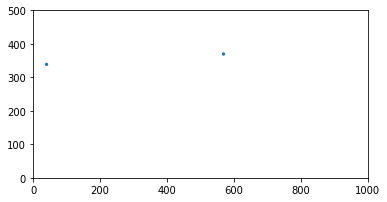

In [ ]:
plt.axes()

for center in initial:
    circle = plt.Circle(center, radius=r)
    plt.gca().add_patch(circle)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()

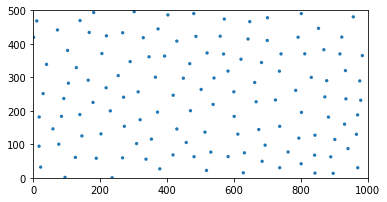

In [6]:
plt.axes()

for center in dist.samples:
    circle = plt.Circle(center, radius=r)
    plt.gca().add_patch(circle)

    # print(center[0], center[1], sep='\t', file=open('porazdelitev.txt', 'a'))

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()

____
2. V središča točk postavim elipse z naključnimi začetnimi orientacijami

In [7]:
a, b = 20, 10                   # mala in velika polos
eps = math.sqrt(1-(b/a)**2)     # ekscentričnost 

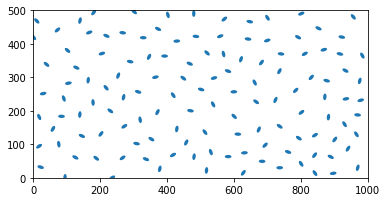

In [8]:
## v točke postavi elipse
# plt.axes()

new_dist = naloga.ellipses(dist, a, b)

for center in new_dist.ell:

    # u = random.uniform(0,1)
    # theta = math.pi*2*u
    theta = center.angle

    va = [math.cos(theta), math.sin(theta)]
    vb = [-math.sin(theta), math.cos(theta)]
    
    ellipse = naloga.ellipse.convert_to_patches(center, a, b)
    plt.gca().add_patch(ellipse)
    # data.append(ellipse)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
# plt.savefig("elipse_512.png")
plt.show()


_____
3. Wertheim-Perramova kontaktna funkcija

$\hat{A}=\sum_{i=1,2} a_i^2 \, \hat{\vec{e}}_i \cdot \hat{\vec{e}}_i^T$

In [9]:
## na diagonale dam velikosti polosi
test = new_dist.ell[:2]
A = np.diag([new_dist.a**2, new_dist.b**2])
display(A)

array([[400,   0],
       [  0, 100]])

$A = R(\theta) \cdot \hat{A} \cdot R^T(\theta)$

In [10]:
display(A, naloga.Rotate(test[1].angle, A))

array([[400,   0],
       [  0, 100]])

matrix([[115.02848358, -65.44226277],
        [-65.44226277, 384.97151642]])

In [11]:
## Funkcija f, ki jo potem moram maksimizirati
display(new_dist.mu(test[0], test[1]))

343.82143341309927

___
Preveri cel grid, če se kaj seka

____
izbriši vse tle dol

In [24]:
def periodic_metric(point1, point2):
    dx = point1[0] - point2[0]
    dy = point1[1] - point2[1]
    if dx > 0.5*width:
        dx = dx - width
    elif dx < -0.5*width:
        dx = dx + width
    if dy > 0.5*height:
        dy = dy - height
    elif dy < -0.5*height:
        dy = dy + height
    return np.array([dx, dy])

In [25]:
## 
def f(x, E1, E2):
    A1 = np.diag([E1.width**2, E1.height**2])
    theta1 = E1.angle*math.pi/180
    A1 = Rotate(theta1, A1)

    A2 = np.diag([E2.width**2, E2.height**2])
    theta2 = E2.angle*math.pi/180
    A2 = Rotate(theta2, A2)

    dr = periodic_metric(E1.center, E2.center)
    C = np.linalg.inv((1-x)*A1 + x*A2)
    return (x*(1-x)*dr@C@dr.T)[0,0]

In [26]:
display(f(0.2, data[0], data[1]))

68.97396255547024

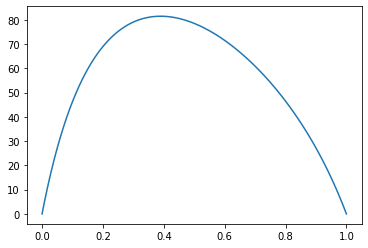

In [27]:
x = np.linspace(0, 1, endpoint=True, num=100)
y = np.vectorize(f)
y = y(x, data[0], data[1])
plt.plot(x, y)
plt.show()

In [1]:
import mitchell

In [11]:
f = lambda center: mitchell.ellipse(center, random.uniform(0,1)*np.pi*2)
F = np.vectorize(f)
data = F(dist.samples)
display(data)

array([[<mitchell.ellipse object at 0x7f6fe8e79d20>,
       ...,
        <mitchell.ellipse object at 0x7f6fe8d01420>]], dtype=object)

In [18]:
(lambda x: x*2)(dist.samples)

array([[1316.42442175,  569.24234429],
       [1873.01170373,  797.13654501],
       [1699.57229907,  506.08328794],
       ...,
       [1374.79130471,  461.55263186],
       [1943.32823478,  164.01440416],
       [1561.59059714,  903.50727835]])

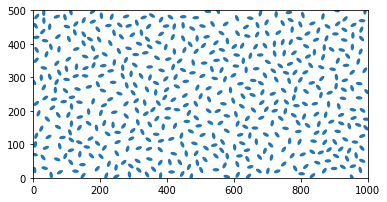

In [ ]:
## v točke postavi elipse
plt.axes()
data = []
for center in dist.samples:

    u = random.uniform(0,1)
    theta = math.pi*2*u

    va = [math.cos(theta), math.sin(theta)]
    vb = [-math.sin(theta), math.cos(theta)]
    
    ellipse = patches.Ellipse(center, a, b, angle=theta*180/math.pi)
    plt.gca().add_patch(ellipse)
    data.append(ellipse)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.savefig("elipse_512.png")
plt.show()
